<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/fake_job_postings_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/Fake Postings.csv")
df.head()

,title,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent
0,Mental health nurse,Arm drive court sure vote. Earn $5000/week! Im...,"Basic knowledge in live, no degree required. F...",Rivera and Sons - Established 2022.,West Jeffrey,$55016-$100476,Internship,IT,Free meals,1
1,Conference centre manager,Government whom its bed go tax tree black. Ear...,"Basic knowledge in seek, no degree required. F...","Davidson, Jones and Gomez - Established 2003.",Lake Meredithberg,$53438-$93138,Part-Time,Finance,Flexible hours,1
2,"Engineer, land",I member discuss follow way there nation. Earn...,"Basic knowledge in worker, no degree required....",Allen Ltd - Established 1998.,Lake Cathybury,$45584-$105229,Part-Time,IT,Free travel,1
3,Forest/woodland manager,House across wait approach face. Earn $5000/we...,"Basic knowledge in example, no degree required...",Forbes Ltd - Established 1990.,South Matthewstad,$66188-$139621,Full-Time,Education,Free travel,1
4,"Production designer, theatre/television/film",Case best environmental full finally leader me...,"Basic knowledge in smile, no degree required. ...","Jennings, Martin and Sanchez - Established 1975.",East Rhondafurt,$32183-$115012,Temporary,Retail,Flexible hours,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            10000 non-null  object
 1   description      10000 non-null  object
 2   requirements     10000 non-null  object
 3   company_profile  10000 non-null  object
 4   location         10000 non-null  object
 5   salary_range     10000 non-null  object
 6   employment_type  10000 non-null  object
 7   industry         10000 non-null  object
 8   benefits         10000 non-null  object
 9   fraudulent       10000 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 781.4+ KB


In [5]:
le=LabelEncoder()
df["title"]=le.fit_transform(df["title"])
df["description"]=le.fit_transform(df["description"])
df["requirements"]=le.fit_transform(df["requirements"])
df["benefits"]=le.fit_transform(df["benefits"])
df["company_profile"]=le.fit_transform(df["company_profile"])
df["location"]=le.fit_transform(df["location"])
df["employment_type"]=le.fit_transform(df["employment_type"])
df["industry"]=le.fit_transform(df["industry"])



In [6]:
df.head(3)

,title,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent
0,376,573,467,7374,93,$55016-$100476,2,4,1,1
1,130,3530,729,2000,43,$53438-$93138,3,2,0,1
2,210,4005,955,100,39,$45584-$105229,3,4,2,1


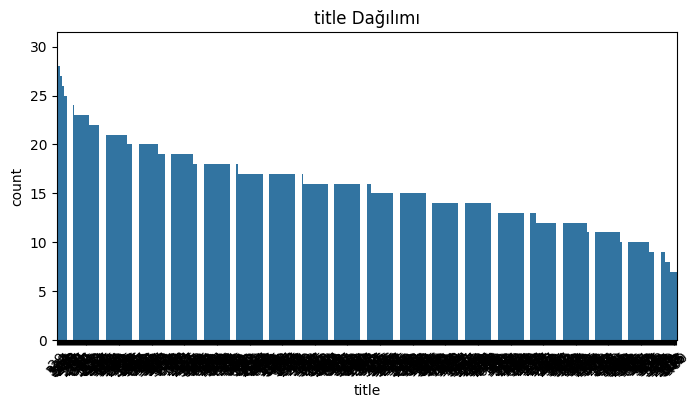

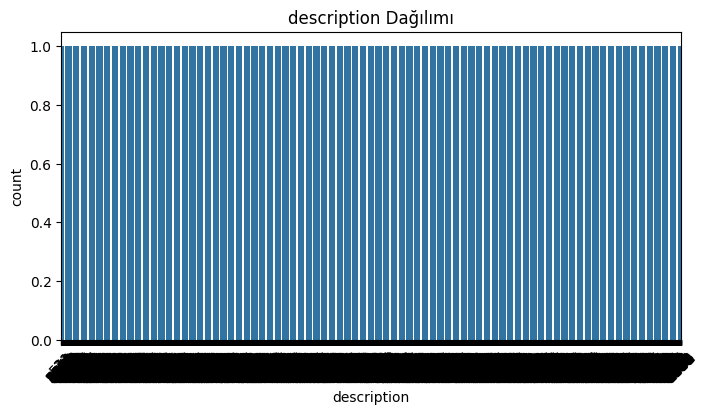

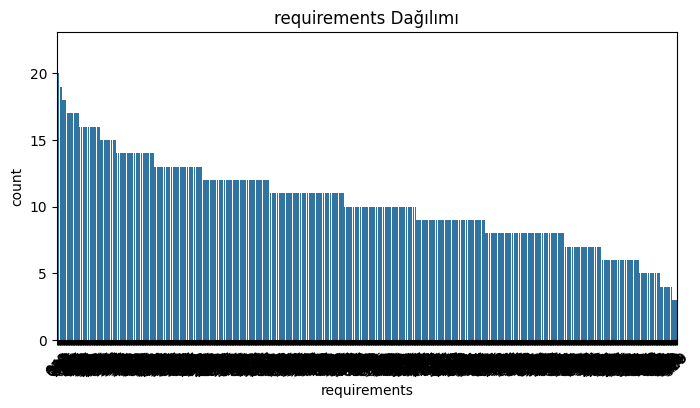

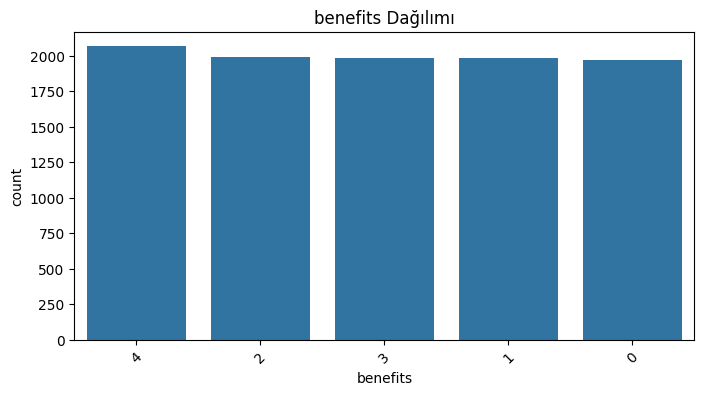

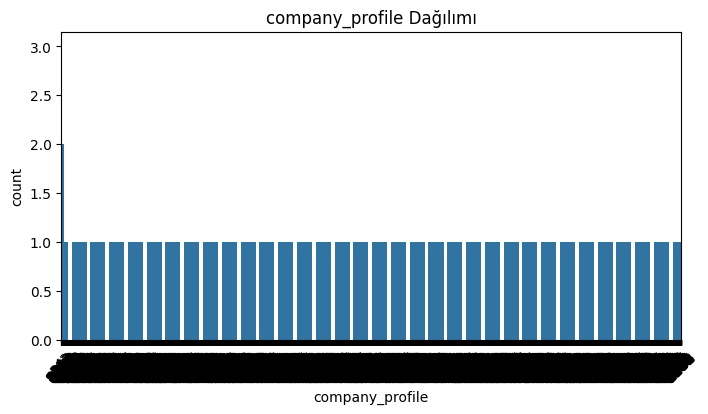

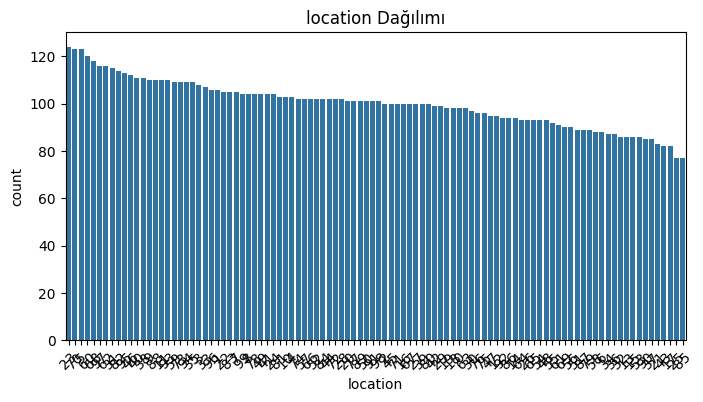

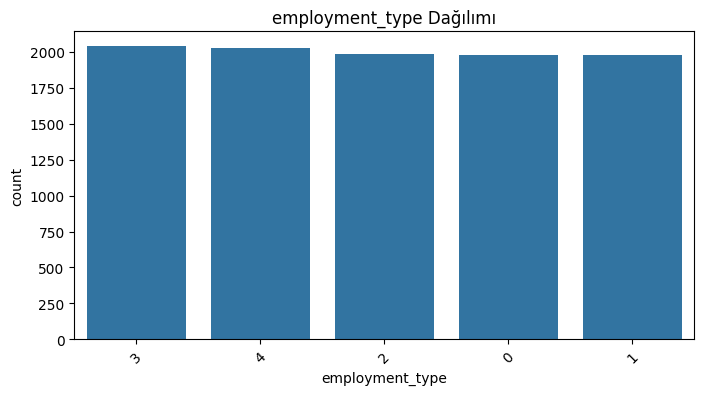

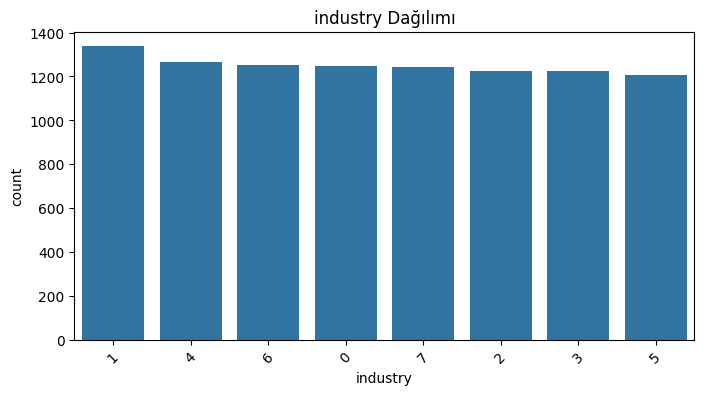

In [7]:
# Kategorik sütunların sayısal dağılımlarını inceleme
categorical_cols = ['title', 'description', 'requirements', 'benefits', 'company_profile', 'location', 'employment_type', 'industry']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col} Dağılımı')
    plt.xticks(rotation=45)
    plt.show()


In [21]:
y=df["fraudulent"]
x=df.drop("fraudulent",axis=1)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [24]:
y_pred=model.predict(x_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

1.0

In [26]:
knn.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])


DataFrame Genel Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            10000 non-null  int64  
 1   description      10000 non-null  int64  
 2   requirements     10000 non-null  int64  
 3   company_profile  10000 non-null  int64  
 4   location         10000 non-null  int64  
 5   employment_type  10000 non-null  int64  
 6   industry         10000 non-null  int64  
 7   benefits         10000 non-null  int64  
 8   fraudulent       10000 non-null  int64  
 9   salary_min       10000 non-null  float64
 10  salary_max       10000 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 859.5 KB
None

İlk 5 Satır:
   title  description  requirements  company_profile  location  \
0    376          573           467             7374        93   
1    130         3530           729             2000        43 

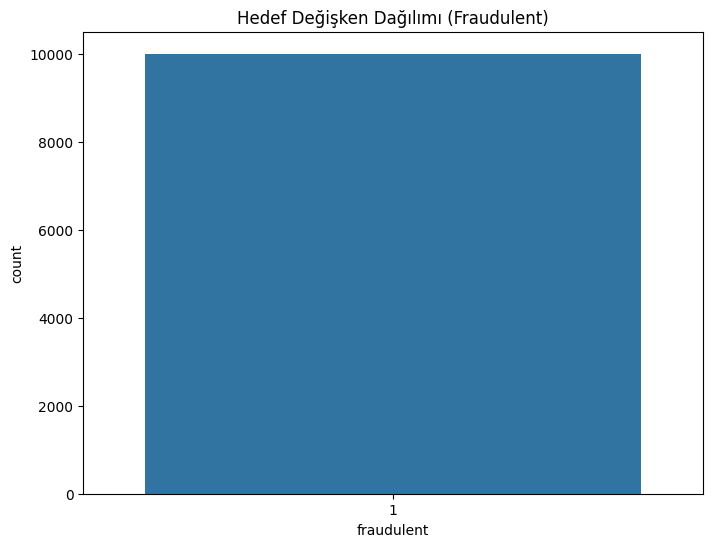


İstatistiksel Özellikler:
              title  description  requirements  company_profile      location  \
count  10000.000000  10000.00000  10000.000000     10000.000000  10000.000000   
mean     321.447900   4999.50000    481.265300      4978.062000     49.715000   
std      184.668182   2886.89568    281.992351      2873.228576     29.063858   
min        0.000000      0.00000      0.000000         0.000000      0.000000   
25%      164.000000   2499.75000    235.000000      2492.750000     24.000000   
50%      322.000000   4999.50000    475.500000      4976.500000     50.000000   
75%      483.000000   7499.25000    726.000000      7468.250000     75.000000   
max      638.000000   9999.00000    970.000000      9952.000000     99.000000   

       employment_type      industry      benefits  fraudulent    salary_min  \
count     10000.000000  10000.000000  10000.000000     10000.0  10000.000000   
mean          2.015400      3.477100      2.019900         1.0  49930.421600   
std

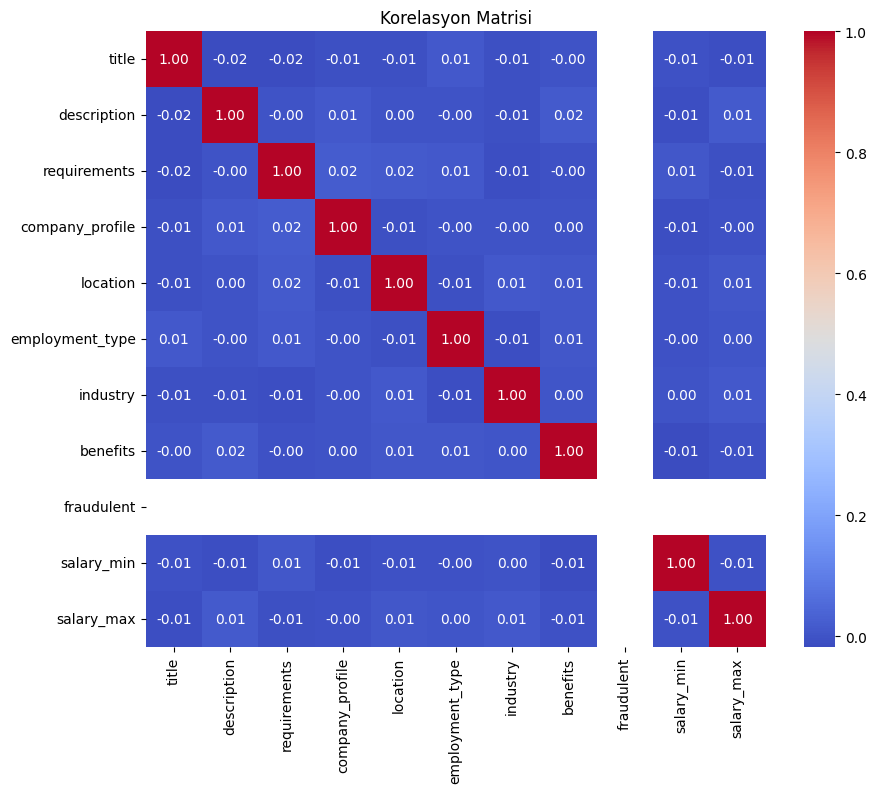

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Genel Bilgiler
print("\nDataFrame Genel Bilgileri:")
print(df.info())
print("\nİlk 5 Satır:")
print(df.head())

# Eksik Veri Analizi
print("\nEksik Veri Analizi:")
print(df.isnull().sum())

# Hedef Değişkenin Dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x="fraudulent", data=df)
plt.title("Hedef Değişken Dağılımı (Fraudulent)")
plt.show()

# Özelliklerin İstatistiksel Özellikleri
print("\nİstatistiksel Özellikler:")
print(df.describe())

# Korelasyon Analizi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()


In [29]:
df.tail()

,title,description,requirements,company_profile,location,employment_type,industry,benefits,fraudulent,salary_min,salary_max
9995,159,9866,231,6484,65,1,6,1,1,39450.0,149734.0
9996,611,2609,906,6071,52,3,4,4,1,49324.0,111597.0
9997,612,9381,242,5018,11,1,1,3,1,41346.0,89686.0
9998,114,9432,133,2204,43,0,2,0,1,65604.0,149614.0
9999,301,5931,613,7836,76,4,5,1,1,56437.0,112301.0


In [38]:
data_point = [[610, 9870, 230, 2205, 56, 1, 5, 1,3,1]]
prediction = knn.predict(data_point)
prediction

array([1])

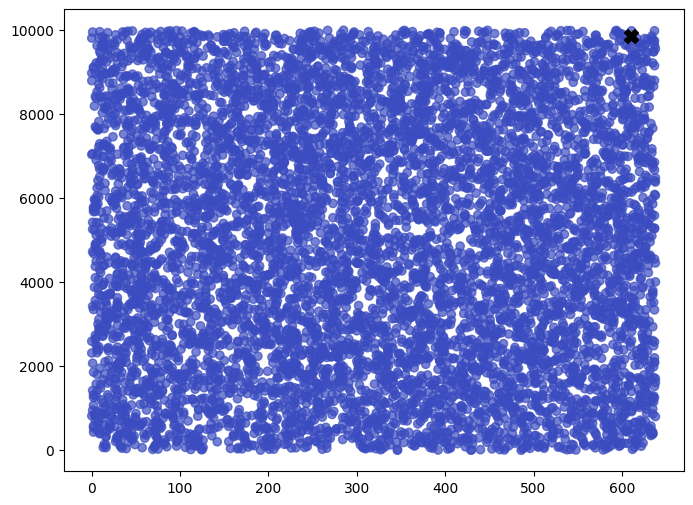

In [41]:


x_data = x_train.iloc[:, 0]
y_data = x_train.iloc[:, 1]


plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, c=y_train, cmap="coolwarm", label="Eğitim Verileri", alpha=0.7)


data_point_x = data_point[0][0]
data_point_y = data_point[0][1]
plt.scatter(data_point_x, data_point_y, color="black", label="Tahmin Noktası", edgecolor="black", s=100, marker="X")

